# Linear Regression Assignment
## Bike Sharing Assignment

#### Problem Statement

Build a multiple linear regression model for the prediction of demand for shared bikes.
Understand the factors affecting the demand for these shared bikes in the American market.
We will try to answer below questions -
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### 1. Data understanding
Read the data

In [945]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import important libraries
import numpy as np
import pandas as pd

In [946]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [947]:
#Check number of rows and columns in the data
bike_data.shape

(730, 16)

In [948]:
#Check if any data is null
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All columns have 730 non-nulls, so we do not have any NULL value

In [949]:
#Check the stats for numeric columns
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [950]:
#Drop unnecessary column - Instant, its just a sequence number
bike_data.drop(["instant"], axis = 1, inplace = True)

In [951]:
bike_data.shape

(730, 15)

### 2. Preparation and EDA

#### Convert Weathersit, Season and Weekday to Categorical String
We will use data disctionary to convert these.

    weathersit : 
             1:Clear
             2:Mist
             3:Rain
             4:Snow

    season :
            1:spring
            2:summer
            3:fall
            4:winter

In [952]:
#Convert weathersit
bike_data["weathersit"] = bike_data["weathersit"].apply(lambda x : 'Clear' if x == 1 else 'Mist' if x == 2 else 'Rain' if x == 3 else 'Snow' )

In [953]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [954]:
#Convert season
bike_data["season"] = bike_data["season"].apply(lambda x : 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter' )

In [955]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualizing the data
Perform Univaraite analysis. Our variable of interest is cnt - count of total rental bikes including both casual and registered

In [956]:
import matplotlib.pyplot as plt
import seaborn as sns

#### For numerical variables we can see the pariplot against cnt

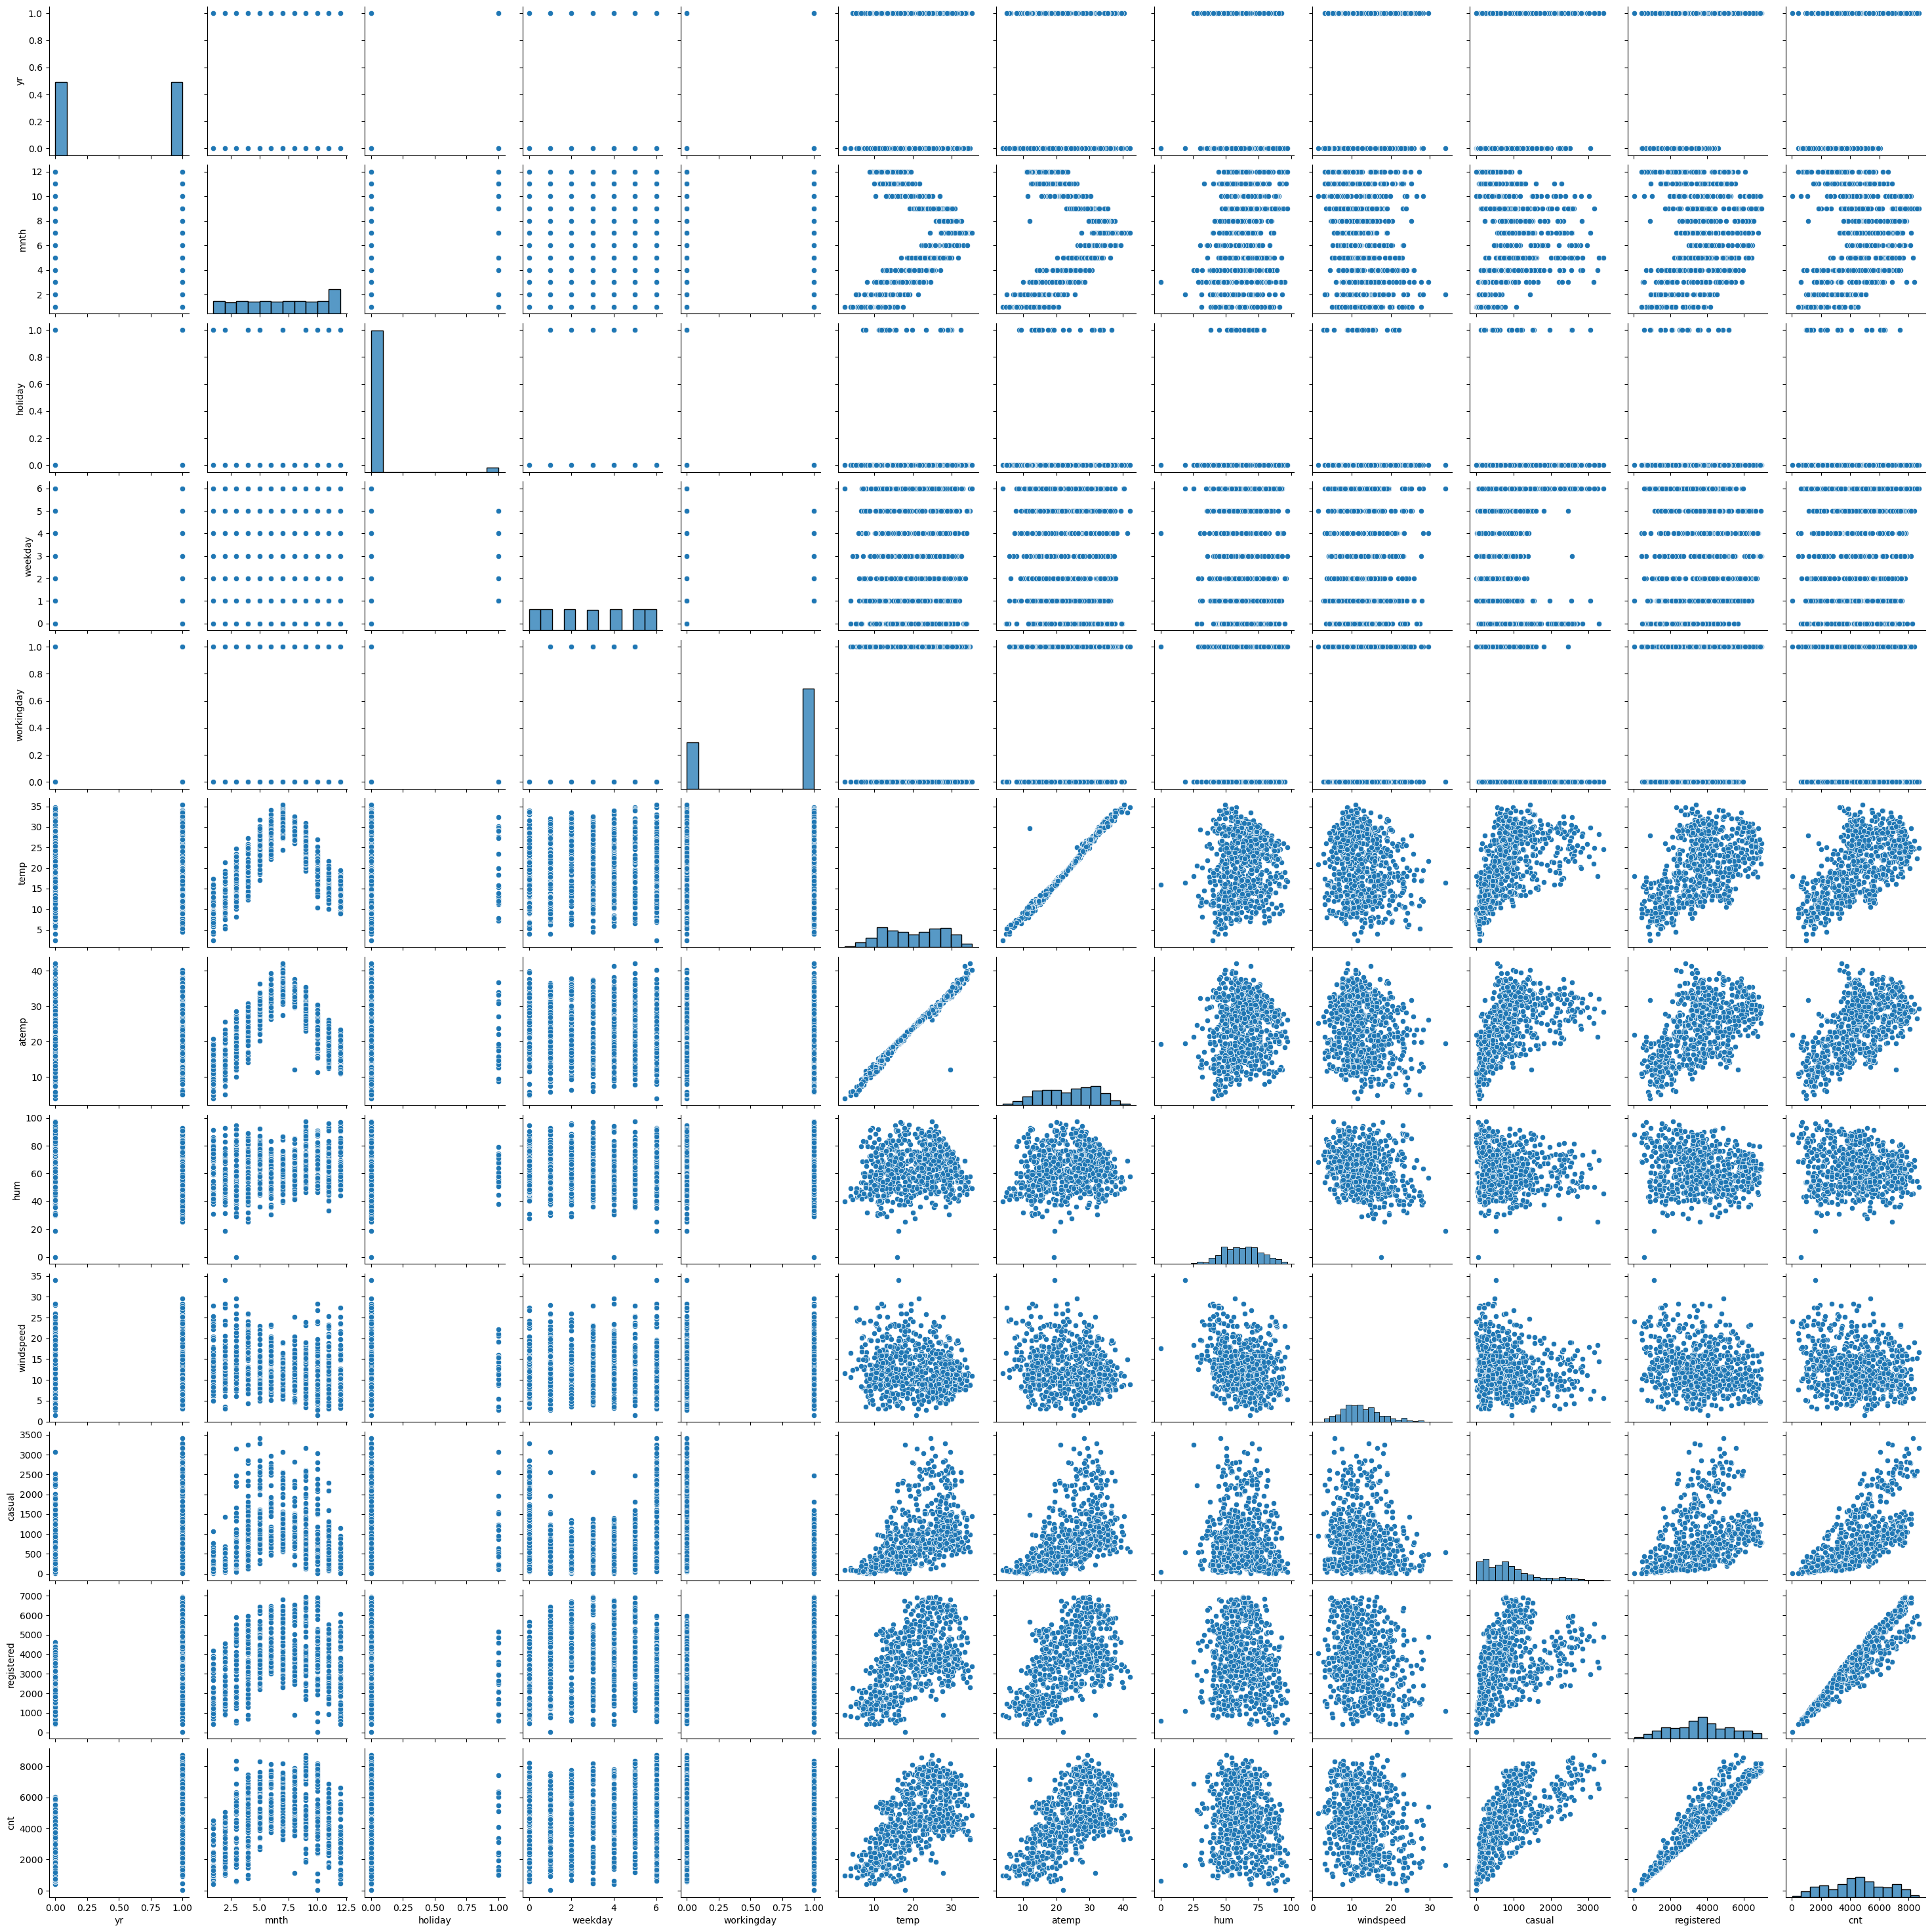

In [957]:
sns.pairplot(bike_data)
plt.show()

#### Obervations
- We can see a linear relation between registered,casual and count of total bike rentals. But its the registered users that contribute more to the main count.
- feeling temperature and temperature have similar relation and its linear to some extent.
- There are more rentals in the year 2019 than 2018.
- windspeed and Humidity don't show much correlation.
- We can also notice a high colinearity between temp and atemp. This is a case of multicolinearity, we will handle via VIF

### Visualising Categorical Variables
We will use box plot for weathersit, season.

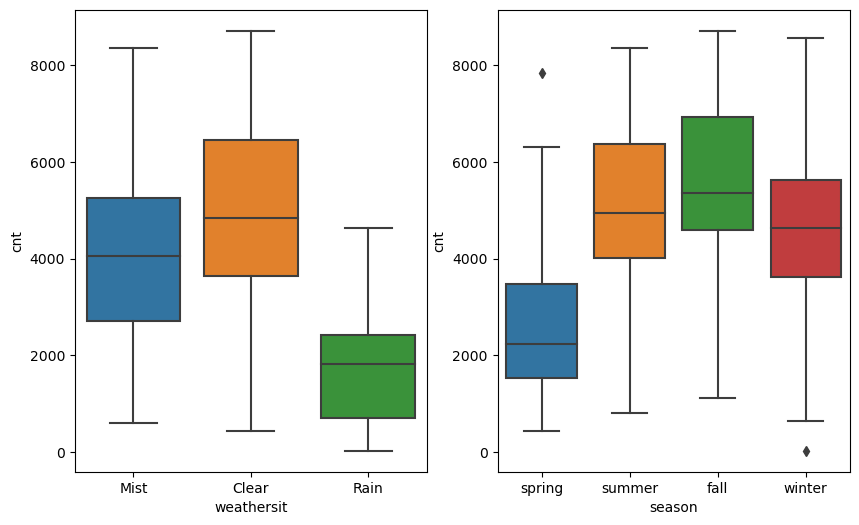

In [958]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.show()

#### Observation
- When the weather is clear there are more bike rentals, and very less during the rainy season.
- Fall seems to be the most preferred season for bike rentals followed by summer. Spring season has least bike rentals.
- We can say that clear sky during fall/summer time will be the best time for rentals.

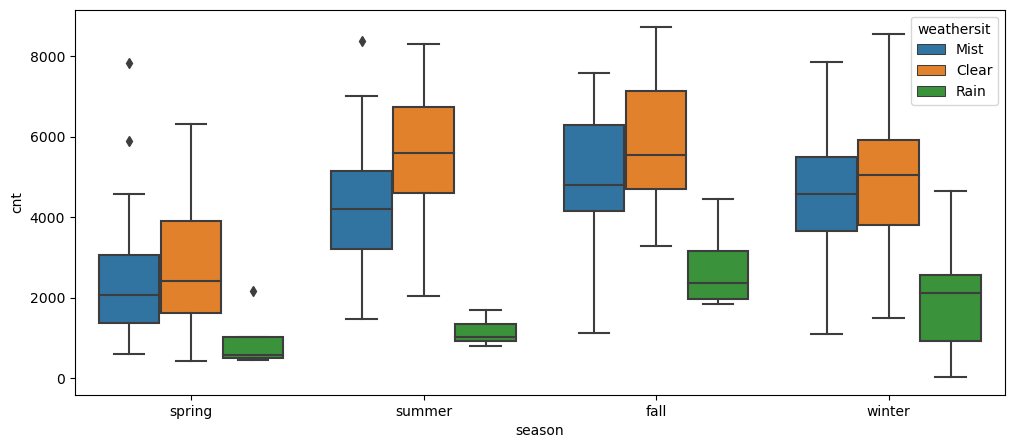

In [959]:
# Lets see for each season how the weathersit impacts the rentals

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike_data)
plt.show()

#### Observation
- Light Snow, Light Rain +Thunderstorm + Scattered clouds, Light Rain + Scattered clouds during Spring/Summer is the worst time for rentals.

### Dummy variables
We will convert the categorical values above to dummy variables. There will be k-1, where k i categorical levels.

In [960]:
# weathersit has 3 values - so there will be 2 dummy variables
weathersit_dummy = pd.get_dummies(bike_data['weathersit'])

In [961]:
weathersit_dummy.head()

,Clear,Mist,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


As we know that for k levels we need k-1 variables, so we can drop one column (`Clear`). Only 2 columns can identify the weathersit.
- `00` will correspond to `Clear`
- `01` will correspond to `Rain`
- `10` will correspond to `Mist`

In [962]:
# Drop first column - Clear
weathersit_dummy = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [963]:
weathersit_dummy.head()

,Mist,Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


#### Similarly lets do for season. 
Season has 4 values, so we will need 3 columns

In [964]:
season_dummy = pd.get_dummies(bike_data['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


To make it 3 columns, we can drop one column (`fall`).
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [965]:
season_dummy = pd.get_dummies(bike_data['season'], drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [966]:
# Lets add these 5 (2+3) columns to the main dataframe
bike_data = pd.concat([bike_data, weathersit_dummy, season_dummy], axis =1)

In [967]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rain,spring,summer,winter
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [968]:
#Drop the categorical columns as we created dummy columns for them
bike_data.drop(['season','weathersit'],axis=1, inplace = True)

In [969]:
print(bike_data.shape)
bike_data.head()

(730, 18)


,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rain,spring,summer,winter
0,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


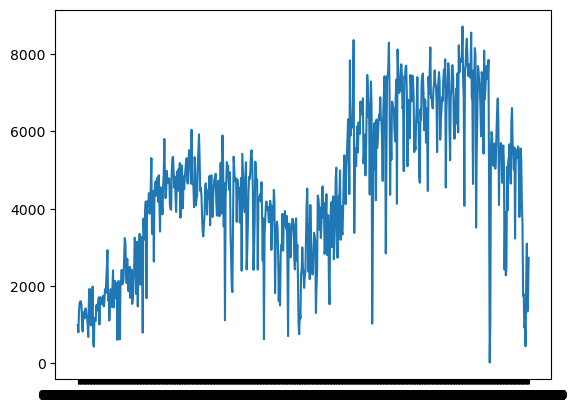

In [970]:
plt.plot(bike_data.dteday, bike_data.cnt)
plt.show()

The plot shows that the rentals increase during the mid of the year and overall have increased from 2018 to 2019. An information we also got from `yr`, `mnth` scatter plot

In [971]:
#Since the information is already there in yr and mnth, we will drop this
bike_data.drop(['dteday'],axis=1, inplace = True)

In [972]:
bike_data.shape

(730, 17)

#### We will also drop regsitered and casual varaibles as they make the target column. 
They are kind of sub-target variables. We can do our analysis on cnt variable only.

In [973]:
#Dropping the variables
bike_data.drop(['registered','casual'],axis=1, inplace = True)

In [975]:
bike_data.shape

(730, 15)

In [976]:
#Moving the target column to the begining so its easy to visualize
cols = list(bike_data)
cols.insert(0, cols.pop(cols.index('cnt')))
bike_data = bike_data.loc[:, cols]

In [977]:
bike_data.head()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
0,985,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,1,0,1,0,0
1,801,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,1,0,0
2,1349,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,0,0,1,0,0
3,1562,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,0,0,1,0,0
4,1600,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,0,0,1,0,0


### Split the data into Training and Testing sets

In [978]:
from sklearn.model_selection import train_test_split

In [979]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, random_state=100)

In [980]:
#Setting test_size =0.3 was resulting in one row missing from test set because of rounding of the split.
#But it was fixed if we remove test_size from above code.

print(bike_train.shape)
print(bike_test.shape)

(510, 15)
(220, 15)


### Rescaling of Features

Since we have multiple variable, the  scale of different variables need to be at same scale, else the coefficient of the variables will not be comparable.

We will use MinMax scaling, to keep the data between 0 and 1

In [981]:
from sklearn.preprocessing import MinMaxScaler

In [983]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric varaibles that need scaling (which are not already 0 and 1s)
num_vars = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

#Fit the scaler on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

#### All variables are now in 0 to 1 scale

In [984]:
bike_train.head()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
576,0.827658,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,0.465255,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,1,0,0
728,0.204096,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0
482,0.482973,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0
111,0.191095,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0


In [985]:
# Max values are 1 and min is 0 for all
bike_train.describe()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.224421,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


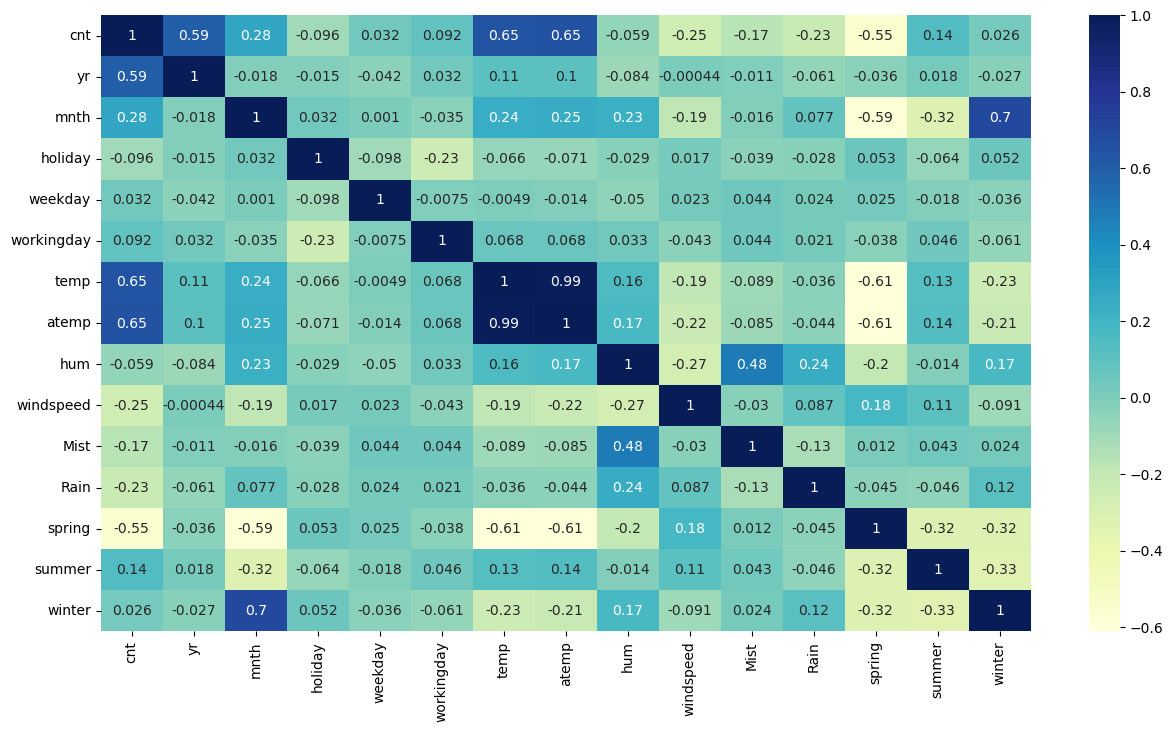

In [986]:
# Checking for correlation coefficients, to see which variables are highly correlated

plt.figure(figsize =(15,8))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation
- `temp`, `atemp`,`yr` and `spring` are correlated to `cnt`. While all others have a `positive` correlation but `spring` has a `negative` correlation.

### 3. Data Modelling

Create X and Y trains. y_train will have the target variable and X_train, remaining variables.

In [987]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [988]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,1,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0


In [989]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

Since there are more variables, instead of adding one by one, we will add all variables and remove the insignificant ones

In [990]:
X_train_lm = sm.add_constant(X_train)

In [991]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const         0.239960
yr            0.232202
mnth          0.014917
holiday      -0.063803
weekday       0.048312
workingday    0.018725
temp          0.432883
atemp         0.062811
hum          -0.128079
windspeed    -0.178342
Mist         -0.056571
Rain         -0.246252
spring       -0.069488
summer        0.047300
winter        0.083461
dtype: float64

In [992]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.01e-182
Time:                        16:34:57   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2400      0.039      6.208      0.0

In [993]:
# We will look into VIF (Variation Inflation Factor) , P value to decided which variables to drop.
#First we will calcualte the VIF (1/(1-Rsquared of features))

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [994]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.33
6,atemp,366.74
7,hum,30.16
1,mnth,12.48
8,windspeed,5.02
13,winter,4.63
11,spring,4.49
4,workingday,3.20
3,weekday,3.17
12,summer,2.72


#### A high value of VIF means a high correlation of a variable with other variables

Here we have `atemp` with high VIF and high p-value, so we will drop it

In [995]:
# As atemp has high VIF and p-Value, lets drop and create another model and see the stats again
X = X_train.drop('atemp',axis =1)

In [996]:
# Create another model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [997]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.35e-183
Time:                        16:35:20   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2398      0.039      6.208      0.0

In [998]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.10
5,temp,16.85
1,mnth,12.48
7,windspeed,4.80
12,winter,4.49
10,spring,4.42
4,workingday,3.20
3,weekday,3.16
11,summer,2.62
8,Mist,2.32


In [999]:
# We have mnth with high p-Value
# Lets remove hum
X = X.drop('mnth',axis =1)

In [1000]:
# Create another model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [1001]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.89e-184
Time:                        16:35:27   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.037      6.741      0.0

In [1002]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.35
4,temp,15.71
6,windspeed,4.69
9,spring,3.90
3,workingday,3.19
2,weekday,3.11
11,winter,3.10
7,Mist,2.28
10,summer,2.28
0,yr,2.08


#### Observation

- VIF for `hum` is high, lets drop it.
- The p-Value of other variables is under 0.05

In [1003]:
X = X.drop('hum',axis =1)
# Create another model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.17e-183
Time:                        16:35:46   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -956.4
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.031      5.887      0.0

In [1004]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.16
2,weekday,3.10
8,spring,2.28
0,yr,2.07
9,summer,1.86
10,winter,1.75
6,Mist,1.55
1,holiday,1.10


There is a slight reduction in R-squared value but now we dont have any variable with more p-Value or VIF.
So this model should be good. temp VIF is still more than 5 but its has a strong coefficient and 0 p-value, so we will keep it.
Rscore is 0.83

In [1005]:
#Just to check what changes if we drop temp considering its more than 5
X_check = X.drop('temp',axis =1)
# Create another model
X_check_train_lm = sm.add_constant(X_check)

lr_5 = sm.OLS(y_train, X_check_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.12e-149
Time:                        16:35:52   Log-Likelihood:                 405.80
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     499   BIC:                            -743.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5568      0.018     31.388      0.0

We can see there is a significant decrease in R-sequared value. So we will not drop temp.

### 4. Residual Analysis

In [1006]:
#Predict value of y from the models
y_train_pred = lr_4.predict(X_train_lm)

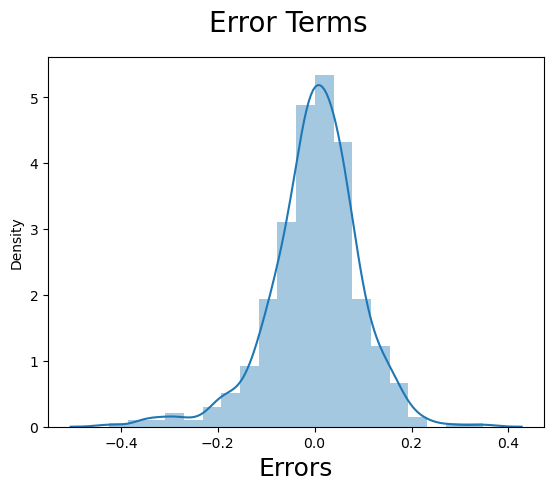

In [1007]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)  # Residual is y train - y_train_pred
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

The distribution of error terms is normal and centered around 0. So we can go ahead with the model and start making prediction on test set and evaluating it.

### 5. Making Predictions

First lets do same preprocessing on test set as we did on train set

In [1008]:
# Scale test dataset

num_vars = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

#Fit the scaler on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
184,0.692706,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,1,0,0,0,0
535,0.712034,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0
299,0.303382,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,1
221,0.547400,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0.569029,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,0,0,1,0


In [1009]:
bike_test.describe()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.522154,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.219163,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378595,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524678,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.677750,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,1.000000,0.000000,1.000000,1.000000,0.000000
max,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000


The min max values are from the training set so we can see they are not exactly o and 1

#### Derive X_test and y_test

In [1010]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [1013]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
184,1.0,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,1,0,0,0,0
535,1.0,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0
299,1.0,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,1
221,1.0,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,0,0,1,0


In [1014]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm as per final X_train_lm

X_test_lm = X_test_lm.drop(["hum", "atemp", "mnth"], axis = 1)

In [1015]:
X_test_lm.describe()

,const,yr,holiday,weekday,workingday,temp,windspeed,Mist,Rain,spring,summer,winter
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.036364,0.502273,0.700000,0.558718,0.313293,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.0,0.500809,0.187620,0.330843,0.459303,0.233187,0.159584,0.466833,0.163248,0.436599,0.441609,0.425817
min,1.0,0.000000,0.000000,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.166667,0.000000,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.500000,1.000000,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.833333,1.000000,0.755981,0.402718,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000


In [1017]:
# Making predictions using the final model

y_test_pred = lr_4.predict(X_test_lm)

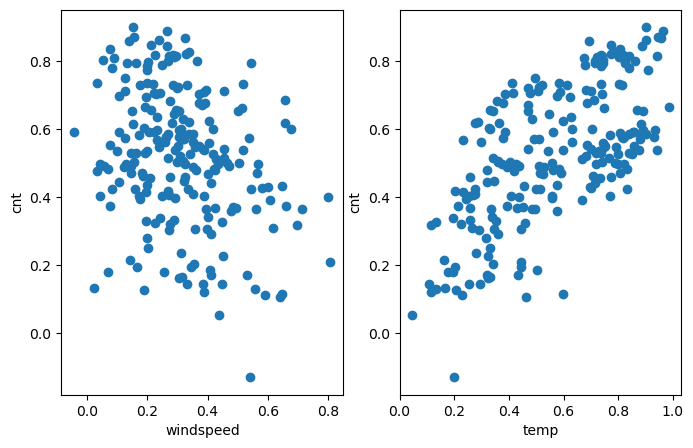

In [1030]:

plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
plt.scatter(X_test_lm.windspeed, y_test_pred)
plt.xlabel("windspeed") #x label
plt.ylabel("cnt") #y label
plt.subplot(1,2,2)
plt.xlabel("temp") #x label
plt.ylabel("cnt") #y label
plt.scatter(X_test_lm.temp, y_test_pred)

plt.show()

A negative realtion of windspeed with rentals and temp with rentals.

### 6. Model Evaluation
Evaludate the model by calculating R2 score

In [1018]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8054089914540108

The R2 score on test set is 0.805 and it was 0.830, which is pretty reasonable. So our Model is able to generalize the leanings from training set on test set.

So we can say that the `atemp` and `yr` impact the bike rentals the most as their correlation coefficients are high as per the model summary.

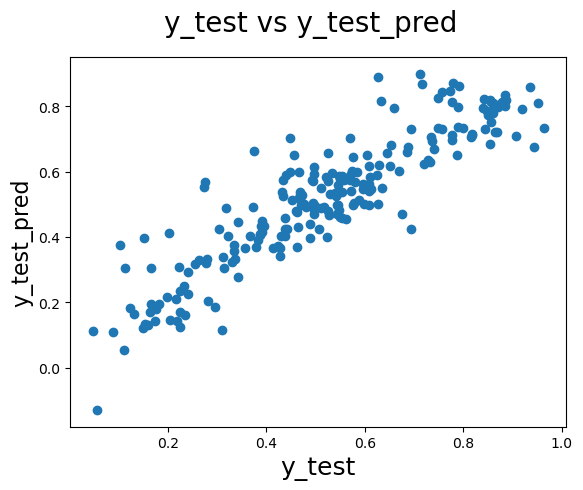

In [1019]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

The linear euqation for our model will be -

`cnt` = 0.1813 + 0.2351*`yr`  - 0.0638*`holiday` + 0.0523*`weekday` + 0.0190*`workingday` + 0.4669*`temp` - 0.1552*`windspeed` - 0.0775*`Mist` - 0.2828*`Rain` - 0.0813*`spring` + 0.0402*`summer` +0.0782*`winter` 